# Time Series

In [2]:
import pandas as pd
import numpy as np
pd.set_option('precision', 7)

import datetime
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline 
# pd.options.display.mpl_style = 'default'

---------
## DateTimeIndex

In [4]:
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
dti = pd.DatetimeIndex(dates)
dti

DatetimeIndex(['2014-08-01', '2014-08-02'], dtype='datetime64[ns]', freq=None)

In [11]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(2), dates)
ts.to_frame()

,0
2014-08-01,0.4691123
2014-08-02,-0.2828633


In [7]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
ts[datetime(2014,8,2)]

-0.2828633443286633

In [15]:
ts['2014-8-2']

-0.2828633443286633

In [16]:
np.random.seed(123456)
dates = ['2014-8-01', '2014-8-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-8-01    0.4691123
2014-8-02   -0.2828633
dtype: float64

----
pd.to_datetime() can be used to create DateTimeIndex objects. Any invalid time is cast as NaT (Not-a-time)

In [18]:
dti = pd.to_datetime(['Aug 1, 2014', '2014-08-02',
                    '2014.8.3', None])
dti

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', 'NaT'], dtype='datetime64[ns]', freq=None)

Using the pd.date_range() we can create a range of timestamps at a specific frequency

In [19]:
dates = pd.date_range('8/1/2014', periods=10)
print(dates)

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', '2014-08-04',
               '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
               '2014-08-09', '2014-08-10'],
              dtype='datetime64[ns]', freq='D')


In [22]:
s1 = pd.Series(np.random.randn(10), dates)
s1.head()

2014-08-01   -1.4784266
2014-08-02    0.5249877
2014-08-03    0.4047052
2014-08-04    0.5770460
2014-08-05   -1.7150020
Freq: D, dtype: float64

In [27]:
import pandas_datareader as web
msft = web.DataReader("MSFT", 'yahoo', '2012-1-1', '2013-12-30')
msft.describe()

,High,Low,Open,Close,Volume,Adj Close
count,501.0000000,501.0000000,501.0000000,501.0000000,5.0100000e+02,501.0000000
mean,31.3894012,30.8739721,31.1285030,31.1492814,4.8339490e+07,26.0127302
std,3.0119238,2.9603806,2.9829984,2.9982206,2.2644530e+07,2.8093919
min,26.6299992,26.2600002,26.3799992,26.3700008,1.4243000e+07,21.7074890
25%,29.0799999,28.6000004,28.8500004,28.7999992,3.5990900e+07,23.9212112
50%,30.9599991,30.4300003,30.6900005,30.7399998,4.4242600e+07,25.2867107
75%,33.3100014,32.5999985,32.9099998,33.0099983,5.3638300e+07,27.9562912
max,38.9799995,38.3699989,38.8499985,38.9399986,2.4842850e+08,33.4514771


In [25]:
msftAC = msft['Adj Close']
msftAC.head()

Date
2012-01-03    21.7074871
2012-01-04    22.2183437
2012-01-05    22.4453945
2012-01-06    22.7940826
2012-01-09    22.4940510
Name: Adj Close, dtype: float64

When we have pandas series indexed by timestamp, we can use a overriden version of the slicing operation, which takes dates in string form

In [29]:
msft['2012-1-1' : '2012-1-5']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.9599991,26.3899994,26.5499992,26.7700005,64731500.0,21.7074890
2012-01-04,27.4699993,26.7800007,26.8199997,27.3999996,80516100.0,22.2183495
2012-01-05,27.7299995,27.2900009,27.3799992,27.6800003,56081400.0,22.4453945


In [31]:
msft.loc['2012-1-3'] 

High         2.6959999e+01
Low          2.6389999e+01
Open         2.6549999e+01
Close        2.6770000e+01
Volume       6.4731500e+07
Adj Close    2.1707489e+01
Name: 2012-01-03 00:00:00, dtype: float64

In [42]:
# msft['2012-1-3'] # This throws a KeyError

In [34]:
msftAC['2012-1-3'] # In a series, this syntax retrieves the index for the timestamp; it doesnt work in a dataframe

21.707487106323242

In [40]:
a,b = msftAC.loc['2012-1-3'], msft.loc['2012-1-3'] # But this syntax works as expected in both series and dataframes
display (a ,b)

21.707487106323242

High         2.6959999e+01
Low          2.6389999e+01
Open         2.6549999e+01
Close        2.6770000e+01
Volume       6.4731500e+07
Adj Close    2.1707489e+01
Name: 2012-01-03 00:00:00, dtype: float64

In [46]:
msft.loc['2012-2'].head()  # We can retrieve a partial chunk of the dates (eg. the month of February 2012) using this syntax

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-02-01,30.0499992,29.7600002,29.7900009,29.8899994,67409900.0,24.2374630
2012-02-02,30.1700001,29.7099991,29.8999996,29.9500008,52223300.0,24.2861118
2012-02-03,30.3999996,30.0900002,30.1399994,30.2399998,41838500.0,24.5212650
2012-02-06,30.2199993,29.9699993,30.0400009,30.2000008,28039700.0,24.4888363
2012-02-07,30.4899998,30.0499992,30.1499996,30.3500004,39242400.0,24.6104660


In [49]:
msft.loc['2012-2' : '2012-2-9'].head() # We can use it to slice a time period

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-02-01,30.0499992,29.7600002,29.7900009,29.8899994,67409900.0,24.2374630
2012-02-02,30.1700001,29.7099991,29.8999996,29.9500008,52223300.0,24.2861118
2012-02-03,30.3999996,30.0900002,30.1399994,30.2399998,41838500.0,24.5212650
2012-02-06,30.2199993,29.9699993,30.0400009,30.2000008,28039700.0,24.4888363
2012-02-07,30.4899998,30.0499992,30.1499996,30.3500004,39242400.0,24.6104660


------
# TimeSeries with specific frequencies

We may specify the time interval between entries to the series. Using the pd.date_range() with the freq parameter, which is "D" (daily frequency) by default

In [58]:
byMinute = pd.Series(np.arange(0, 1180800), pd.date_range('2012-08-01', '2014-10-29 23:59:00', freq='T'))
byMinute # Index has a minute-wise frequency

2012-08-01 00:00:00          0
2012-08-01 00:01:00          1
2012-08-01 00:02:00          2
2012-08-01 00:03:00          3
2012-08-01 00:04:00          4
                        ...   
2014-10-29 23:55:00    1180795
2014-10-29 23:56:00    1180796
2014-10-29 23:57:00    1180797
2014-10-29 23:58:00    1180798
2014-10-29 23:59:00    1180799
Freq: T, Length: 1180800, dtype: int64

In [62]:
# What happened on 2014-08-1 between 12:30 and 1:00 pm?
byMinute.loc['2014-08-01 12:30' : '2014-08-01 13:00'][:5]


2014-08-01 12:30:00    1051950
2014-08-01 12:31:00    1051951
2014-08-01 12:32:00    1051952
2014-08-01 12:33:00    1051953
2014-08-01 12:34:00    1051954
Freq: T, dtype: int64

-----------
# Representing intervals of time using periods

In [63]:
aug2014 = pd.Period('2014-08', freq="M")
aug2014

Period('2014-08', 'M')

In [65]:
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [66]:
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [67]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

In [68]:
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]')

We can create a series with a PeriodIndex object as its index. This means that each row can represent a whole interval of time, instead of just a particular point in time

In [74]:
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013, name="SeriesName")
ps

2013-01    0.4691123
2013-02   -0.2828633
2013-03   -1.5090585
2013-04   -1.1356324
2013-05    1.2121120
2013-06   -0.1732146
2013-07    0.1192087
2013-08   -1.0442360
2013-09   -0.8618490
2013-10   -2.1045692
2013-11   -0.4949293
2013-12    1.0718038
Freq: M, Name: SeriesName, dtype: float64

-------
# Shifting and lagging time series data

In [75]:
msftAC.head(10)

Date
2012-01-03    21.7074871
2012-01-04    22.2183437
2012-01-05    22.4453945
2012-01-06    22.7940826
2012-01-09    22.4940510
2012-01-10    22.5751400
2012-01-11    22.4778309
2012-01-12    22.7048779
2012-01-13    22.9075966
2012-01-17    22.9157104
Name: Adj Close, dtype: float64

In [82]:
shifted_forward = msftAC.shift(20)
shifted_forward.head(10)

Date
2012-01-03   NaN
2012-01-04   NaN
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
2012-01-10   NaN
2012-01-11   NaN
2012-01-12   NaN
2012-01-13   NaN
2012-01-17   NaN
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

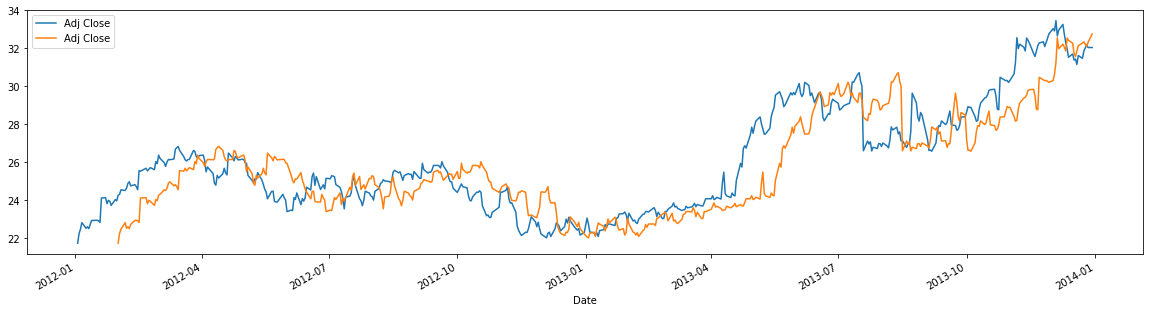

In [85]:
ds = pd.concat([msftAC, shifted_forward], axis=1)
ds.plot(figsize=(20,5))

In [86]:
msftAC.shift(1, freq='S')

Date
2012-01-03 00:00:01    21.7074871
2012-01-04 00:00:01    22.2183437
2012-01-05 00:00:01    22.4453945
2012-01-06 00:00:01    22.7940826
2012-01-09 00:00:01    22.4940510
                          ...    
2013-12-23 00:00:01    31.4584751
2013-12-24 00:00:01    31.8536453
2013-12-26 00:00:01    32.1628914
2013-12-27 00:00:01    32.0340500
2013-12-30 00:00:01    32.0340500
Name: Adj Close, Length: 501, dtype: float64

We can use pd.shift() for calculating percent change in price over a period of time (eg. % change in price daily)

In [90]:
msftAC / msftAC.shift(1)-1

Date
2012-01-03          NaN
2012-01-04    0.0235337
2012-01-05    0.0102191
2012-01-06    0.0155350
2012-01-09   -0.0131627
                ...    
2013-12-23   -0.0048913
2013-12-24    0.0125616
2013-12-26    0.0097083
2013-12-27   -0.0040059
2013-12-30    0.0000000
Name: Adj Close, Length: 501, dtype: float64

-----
# Frequency conversion of time-series data

In [91]:
sample = msftAC[:2]
sample

Date
2012-01-03    21.7074871
2012-01-04    22.2183437
Name: Adj Close, dtype: float64

In the previous cell we grabbed the adjusted close price of MSFT stock for the 3rd (and 4th) day of January 2012. Suppose we want to resample this data, and get information about the change in price over those two days, but hourly.

In [93]:
sample.asfreq("H") # this will only cover the 3rd day: the last entry will be the price at 00:00:00 on January 4th!

Date
2012-01-03 00:00:00    21.7074871
2012-01-03 01:00:00           NaN
2012-01-03 02:00:00           NaN
2012-01-03 03:00:00           NaN
2012-01-03 04:00:00           NaN
2012-01-03 05:00:00           NaN
2012-01-03 06:00:00           NaN
2012-01-03 07:00:00           NaN
2012-01-03 08:00:00           NaN
2012-01-03 09:00:00           NaN
2012-01-03 10:00:00           NaN
2012-01-03 11:00:00           NaN
2012-01-03 12:00:00           NaN
2012-01-03 13:00:00           NaN
2012-01-03 14:00:00           NaN
2012-01-03 15:00:00           NaN
2012-01-03 16:00:00           NaN
2012-01-03 17:00:00           NaN
2012-01-03 18:00:00           NaN
2012-01-03 19:00:00           NaN
2012-01-03 20:00:00           NaN
2012-01-03 21:00:00           NaN
2012-01-03 22:00:00           NaN
2012-01-03 23:00:00           NaN
2012-01-04 00:00:00    22.2183437
Freq: H, Name: Adj Close, dtype: float64

Pandas will fill all inbetween rows with NaNs by default. The pd.asfreq() method can be told how to fill those rows with the method parameter

In [95]:
sample.asfreq("H", method='ffill') ## Fill all of jan-3 hours with the price at 00:00:00 jan-3

Date
2012-01-03 00:00:00    21.7074871
2012-01-03 01:00:00    21.7074871
2012-01-03 02:00:00    21.7074871
2012-01-03 03:00:00    21.7074871
2012-01-03 04:00:00    21.7074871
2012-01-03 05:00:00    21.7074871
2012-01-03 06:00:00    21.7074871
2012-01-03 07:00:00    21.7074871
2012-01-03 08:00:00    21.7074871
2012-01-03 09:00:00    21.7074871
2012-01-03 10:00:00    21.7074871
2012-01-03 11:00:00    21.7074871
2012-01-03 12:00:00    21.7074871
2012-01-03 13:00:00    21.7074871
2012-01-03 14:00:00    21.7074871
2012-01-03 15:00:00    21.7074871
2012-01-03 16:00:00    21.7074871
2012-01-03 17:00:00    21.7074871
2012-01-03 18:00:00    21.7074871
2012-01-03 19:00:00    21.7074871
2012-01-03 20:00:00    21.7074871
2012-01-03 21:00:00    21.7074871
2012-01-03 22:00:00    21.7074871
2012-01-03 23:00:00    21.7074871
2012-01-04 00:00:00    22.2183437
Freq: H, Name: Adj Close, dtype: float64

In [98]:
sample.asfreq("H", method="bfill") # Fill backwards from the price at jan-4

Date
2012-01-03 00:00:00    21.7074871
2012-01-03 01:00:00    22.2183437
2012-01-03 02:00:00    22.2183437
2012-01-03 03:00:00    22.2183437
2012-01-03 04:00:00    22.2183437
2012-01-03 05:00:00    22.2183437
2012-01-03 06:00:00    22.2183437
2012-01-03 07:00:00    22.2183437
2012-01-03 08:00:00    22.2183437
2012-01-03 09:00:00    22.2183437
2012-01-03 10:00:00    22.2183437
2012-01-03 11:00:00    22.2183437
2012-01-03 12:00:00    22.2183437
2012-01-03 13:00:00    22.2183437
2012-01-03 14:00:00    22.2183437
2012-01-03 15:00:00    22.2183437
2012-01-03 16:00:00    22.2183437
2012-01-03 17:00:00    22.2183437
2012-01-03 18:00:00    22.2183437
2012-01-03 19:00:00    22.2183437
2012-01-03 20:00:00    22.2183437
2012-01-03 21:00:00    22.2183437
2012-01-03 22:00:00    22.2183437
2012-01-03 23:00:00    22.2183437
2012-01-04 00:00:00    22.2183437
Freq: H, Name: Adj Close, dtype: float64

---------
# Resampling of time series 

Instead of simply filling missing values, we may resample, either downsample (eg. day-to-day to month-to-month)

We will calculate daily cumulative for MSFT stock over 2012 and 2013 and resample it to monthly frequency. 

In [99]:
msft_cum_ret = (1 + (msftAC/ msftAC.shift() - 1)).cumprod()
msft_cum_ret

Date
2012-01-03          NaN
2012-01-04    1.0235337
2012-01-05    1.0339932
2012-01-06    1.0500563
2012-01-09    1.0362347
                ...    
2013-12-23    1.4491993
2013-12-24    1.4674036
2013-12-26    1.4816497
2013-12-27    1.4757143
2013-12-30    1.4757143
Name: Adj Close, Length: 501, dtype: float64

In [110]:
# msft_monthly_cum_ret = msft_cum_ret.resample("M", how='mean')  # this changed from the version of Pandas used in the book

msft_monthly_cum_ret = msft_cum_ret.resample("M") # pd.resample() returns a DatetimeIndexResample object
msft_monthly_cum_ret.mean() # which seems to be lazily evaluated

Date
2012-01-31    1.0686747
2012-02-29    1.1556975
2012-03-31    1.2105696
2012-04-30    1.1846437
2012-05-31    1.1405160
2012-06-30    1.1233435
2012-07-31    1.1262452
2012-08-31    1.1536294
2012-09-30    1.1727560
2012-10-31    1.1073820
2012-11-30    1.0648221
2012-12-31    1.0358096
2013-01-31    1.0462064
2013-02-28    1.0678735
2013-03-31    1.0898929
2013-04-30    1.1568918
2013-05-31    1.3204532
2013-06-30    1.3507123
2013-07-31    1.3124113
2013-08-31    1.2726699
2013-09-30    1.2773969
2013-10-31    1.3503984
2013-11-30    1.4719150
2013-12-31    1.4823626
Freq: M, Name: Adj Close, dtype: float64

In [112]:
# msft_monthly_cum_ret = msft_cum_ret.resample("M", how='ohlc') # in the book's version of pandas
msft_monthly_cum_ret.ohlc() 

,open,high,low,close
Date,,,,
2012-01-31,1.0235337,1.1105716,1.0235337,1.1031006
2012-02-29,1.1165485,1.1983492,1.1165485,1.1934611
2012-03-31,1.2141419,1.2351985,1.1866927,1.2130136
2012-04-30,1.2141419,1.2190299,1.1411956,1.2039894
2012-05-31,1.2036133,1.2036133,1.0998597,1.1047801
2012-06-30,1.0767728,1.1706355,1.0767728,1.1577673
2012-07-31,1.1566316,1.1642013,1.0835851,1.1153774
2012-08-31,1.1131066,1.1772476,1.1047801,1.1741998
2012-09-30,1.1578170,1.1982018,1.1338155,1.1338155


<AxesSubplot:xlabel='Date'>

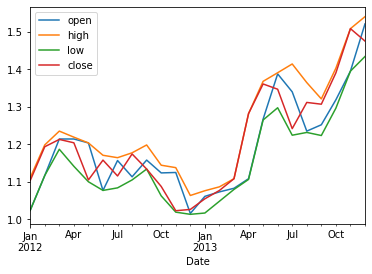

In [113]:
msft_monthly_cum_ret.ohlc().plot()